In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
plt.style.use('tableau-colorblind10')
color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 
         'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

In [2]:
# import statsmodels.api as sm
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
# from imblearn.over_sampling import SMOTE
# from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler, LabelEncoder

In [3]:
df_train = pd.read_csv('train.csv')
df_train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,1985,30,9,8,2,3,0,47.18,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,1986,Y,1,...,2016,4,3,3,0,4,1,50.87,0.0,0
11149,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,1988,Y,2,...,2015,3,1,2,0,6,0,79.91,0.0,0
11150,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,1991,Y,0,...,2017,2,1,2,0,4,0,78.38,0.0,0
11151,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,1987,Y,1,...,2012,5,5,4,0,4,1,85.94,1.0,0


## Data Summary

In [4]:
summary = []

for col in df_train.columns:
    summary.append([col, df_train[col].dtype, df_train[col].isnull().sum(),
                   round(df_train[col].isnull().sum()/len(df_train)*100,2), 
                   df_train[col].nunique(), list(df_train[col].sample(5).drop_duplicates().values)
                   ])
    
df_summary = pd.DataFrame(summary, columns='column dtype null null_Pct nunique sample'.split(" "))
df_summary

,column,dtype,null,null_Pct,nunique,sample
0,job_level,object,0,0.00,3,[JG04]
1,job_duration_in_current_job_level,float64,0,0.00,97,"[2.7073972741361803, 1.2569805089976498, 1.081..."
2,person_level,object,0,0.00,8,"[PG03, PG06]"
3,job_duration_in_current_person_level,float64,0,0.00,72,"[1.0816653826392, 1.22474487139159, 0.5, 1.352..."
4,job_duration_in_current_branch,float64,0,0.00,69,"[0.707106781186548, 1.58113883008419, 1.118033..."
5,Employee_type,object,0,0.00,3,[RM_type_A]
6,gender,int64,0,0.00,2,"[2, 1]"
7,age,int64,0,0.00,35,"[1988, 1984, 1986, 1985, 1989]"
8,marital_status_maried(Y/N),object,0,0.00,2,"[Y, N]"
9,number_of_dependences,int64,0,0.00,7,"[1, 0, 2]"


## Check Null Values

In [5]:
df_train.isnull().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       1
Achievement_above_100%_during3quartal    1
Best Performance                         0
dtype: int64

In [6]:
df_train.loc[df_train['Last_achievement_%'].isnull()]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
1882,JG04,1.292285,PG03,1.292285,0.911043,RM_type_A,1,1991,N,0,...,2012,5,4,5,0,1,15,NaN,NaN,0


In [7]:
df_train.loc[df_train['Achievement_above_100%_during3quartal'].isnull()]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
1882,JG04,1.292285,PG03,1.292285,0.911043,RM_type_A,1,1991,N,0,...,2012,5,4,5,0,1,15,NaN,NaN,0


In [8]:
df_train.dropna(inplace=True)

## Checking Proportion Y lable

In [9]:
df_train['Best Performance'].value_counts()

0    9515
1    1637
Name: Best Performance, dtype: int64

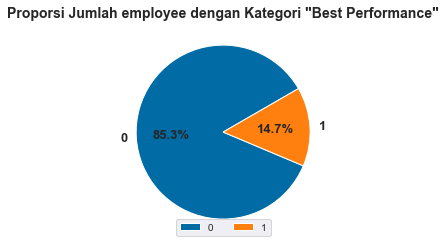

In [10]:
plt.figure(figsize=(4,4))
plt.title('Proporsi Jumlah employee dengan Kategori "Best Performance"', fontsize=14, fontweight='bold')
plt.pie(df_train['Best Performance'].value_counts(), 
       autopct='%.1f%%', labels=df_train['Best Performance'].value_counts().index, 
       textprops={'fontsize':13,'fontweight':'bold'}, startangle=30)
plt.legend(loc='lower center', ncol=3)
plt.show()

## Manipulate `GPA` Column

In [11]:
df_train['GPA'].describe()

count    11152.000000
mean         3.176221
std         13.322284
min          0.000000
25%          2.820000
50%          3.070000
75%          3.270000
max        378.000000
Name: GPA, dtype: float64

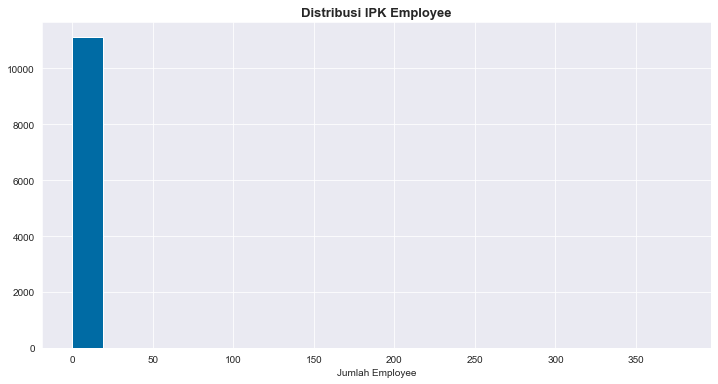

In [12]:
plt.figure(figsize=(12,6))
plt.title('Distribusi IPK Employee', fontsize=13, fontweight='bold')
df_train['GPA'].hist(bins=20)
plt.xlabel('IPK')
plt.xlabel('Jumlah Employee')
plt.show()

Distribusi nilai IPK di atas tidak normal. Karena nilai Maksimum IPK adalah 4.00

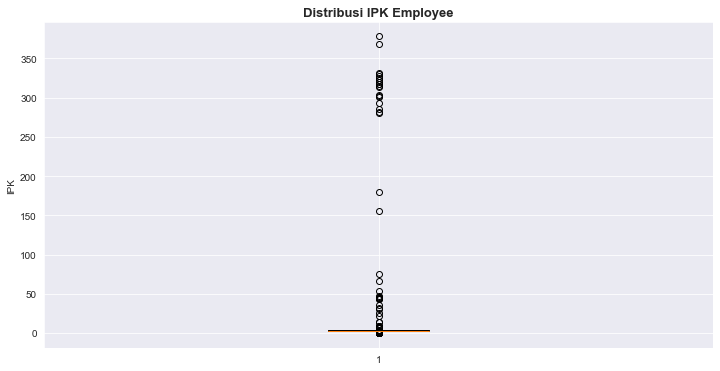

In [13]:
plt.figure(figsize=(12,6))
plt.title('Distribusi IPK Employee', fontsize=13, fontweight='bold')
plt.boxplot(df_train['GPA'])
plt.ylabel('IPK')
plt.show()

In [14]:
#Normal GPA
normal_gpa = df_train[(df_train['GPA']<=4.00) & (df_train['GPA']>0.5)]
normal_gpa['GPA'].describe()

count    8951.000000
mean        3.160937
std         0.242433
min         2.000000
25%         3.000000
50%         3.140000
75%         3.310000
max         3.970000
Name: GPA, dtype: float64

In [15]:
#Not Normal GPA
wrong_gpa = df_train[(df_train['GPA']>4.00) | (df_train['GPA']<0.5)]
wrong_gpa['GPA'].describe()

count    2201.000000
mean        3.238378
std        29.989234
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       378.000000
Name: GPA, dtype: float64

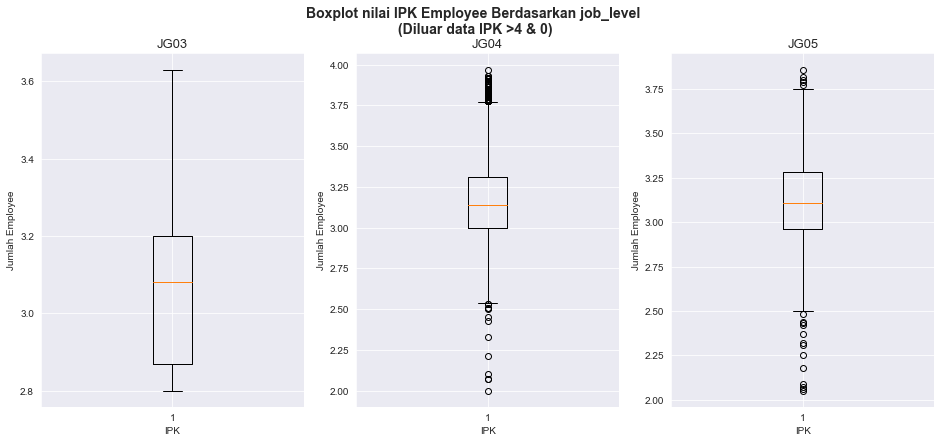

In [16]:
JG = ['JG03','JG04','JG05']

plt.figure(figsize=(16,6.5))
plt.suptitle('Boxplot nilai IPK Employee Berdasarkan job_level\n (Diluar data IPK >4 & 0)', fontsize=14, fontweight='bold')
for x in range(len(JG)) :
    plt.subplot(1,3,x+1)
    plt.title('JG0'+str(3+x), fontsize=13)
    plt.boxplot(normal_gpa[normal_gpa['job_level']==JG[x]]['GPA'])
    plt.xlabel('IPK')
    plt.ylabel('Jumlah Employee')

In [17]:
jg03_normal_gpa = normal_gpa[normal_gpa['job_level']=='JG03']['GPA']
jg03_normal_gpa.describe()

count    29.000000
mean      3.095172
std       0.232389
min       2.800000
25%       2.870000
50%       3.080000
75%       3.200000
max       3.630000
Name: GPA, dtype: float64

In [18]:
jg04_normal_gpa = normal_gpa[normal_gpa['job_level']=='JG04']['GPA']
jg04_normal_gpa.describe()

count    8413.000000
mean        3.164201
std         0.239812
min         2.000000
25%         3.000000
50%         3.140000
75%         3.310000
max         3.970000
Name: GPA, dtype: float64

In [19]:
jg05_normal_gpa = normal_gpa[normal_gpa['job_level']=='JG05']['GPA']
jg05_normal_gpa.describe()

count    509.000000
mean       3.110747
std        0.277930
min        2.050000
25%        2.960000
50%        3.110000
75%        3.280000
max        3.860000
Name: GPA, dtype: float64

In [20]:
wrong_gpa[wrong_gpa['job_level']=='JG03']['GPA']

2167    0.0
2572    0.0
2624    0.0
4258    0.0
5365    0.0
7426    0.0
7898    0.0
Name: GPA, dtype: float64

In [21]:
def fixing_gpa(x):
    jg = x[0]
    gpa = x[1]
    
    if gpa > 4.00 or gpa < 0.50:
        if jg == 'JG03':
            return 3.08
        elif jg == 'JG04':
            return 3.14
        elif jg == 'JG05':
            return 3.11
    else:
        return gpa

In [22]:
#Impute Not normal GPA with the median value of GPA by job_level
df_train['GPA'] = df_train[['job_level','GPA']].apply(fixing_gpa,axis=1)

In [23]:
df_train[df_train['job_level']=='JG03']['GPA']

386      3.26
401      2.99
820      3.00
845      2.80
1184     2.80
1270     2.85
1337     2.87
1589     3.34
1754     3.15
1879     2.81
1890     3.13
1978     2.95
2167     3.08
2503     3.20
2572     3.08
2624     3.08
2948     3.18
2999     3.34
3016     3.07
3557     2.80
3569     3.63
4258     3.08
5137     3.00
5290     3.53
5365     3.08
5392     2.87
6961     3.11
7426     3.08
7898     3.08
7953     3.09
8688     3.50
8711     3.08
8777     3.07
9061     3.33
10072    2.81
11074    3.20
Name: GPA, dtype: float64

## Manipulate `age` column

In [24]:
df_train['age']

0        1985
1        1989
2        1970
3        1967
4        1965
         ... 
11148    1986
11149    1988
11150    1991
11151    1987
11152    1980
Name: age, Length: 11152, dtype: int64

In [25]:
df_train['age_now'] = 2021-df_train['age']

In [26]:
df_train['age_now'].describe()

count    11152.000000
mean        35.163379
std          4.632164
min         24.000000
25%         32.000000
50%         34.000000
75%         36.000000
max         58.000000
Name: age_now, dtype: float64

## Manipulate `year_graduate` column

In [27]:
df_train['year_graduated']

0        2011
1        2007
2        1989
3        1987
4        1985
         ... 
11148    2016
11149    2015
11150    2017
11151    2012
11152    2009
Name: year_graduated, Length: 11152, dtype: int64

In [28]:
df_train['year_since_graduated'] = 2021-df_train['year_graduated']

In [29]:
df_train['year_since_graduated'].describe()

count    11152.00000
mean        11.82613
std          4.11726
min          2.00000
25%          9.00000
50%         11.00000
75%         13.00000
max         39.00000
Name: year_since_graduated, dtype: float64

In [30]:
df_train.drop(['age', 'year_graduated'], axis=1, inplace=True)

In [31]:
df_train.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,marital_status_maried(Y/N),number_of_dependences,Education_level,...,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,age_now,year_since_graduated
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,Y,1,level_0,...,2,3,2,3,0,46.37,0.0,0,36,10
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,Y,0,level_1,...,4,3,0,0,1,47.68,0.0,0,32,14
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,Y,1,level_1,...,10,9,6,2,1,40.73,0.0,0,51,32
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,Y,2,level_1,...,11,6,0,4,10,47.42,0.0,1,54,34
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,Y,3,level_1,...,9,8,2,3,0,47.18,0.0,0,56,36


In [32]:
df_train.columns

Index(['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type', 'gender',
       'marital_status_maried(Y/N)', 'number_of_dependences',
       'Education_level', 'GPA', 'job_duration_from_training',
       'branch_rotation', 'job_rotation', 'assign_of_otherposition',
       'annual leave', 'sick_leaves', 'Last_achievement_%',
       'Achievement_above_100%_during3quartal', 'Best Performance', 'age_now',
       'year_since_graduated'],
      dtype='object')

In [33]:
df_train.shape

(11152, 22)

## Manipulate `Best Performance`

In [34]:
df_train1 = df_train.copy()

### `Best Performance`

In [35]:
best_employee = df_train1[(df_train1['Last_achievement_%']>=100.00) & (df_train1['Achievement_above_100%_during3quartal']==3)]
best_employee

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,marital_status_maried(Y/N),number_of_dependences,Education_level,...,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,age_now,year_since_graduated
46,JG04,1.385641,PG03,1.385641,1.224745,RM_type_A,2,Y,2,level_1,...,3,3,2,3,1,121.61,3.0,0,33,15
48,JG04,1.606238,PG03,1.606238,1.039230,RM_type_A,2,Y,2,level_1,...,3,2,5,10,0,105.86,3.0,0,45,26
51,JG05,2.828427,PG06,2.828427,1.824829,RM_type_A,1,Y,2,level_1,...,7,8,0,8,3,109.30,3.0,0,52,33
52,JG05,2.828427,PG06,2.345208,1.224745,RM_type_A,2,Y,1,level_1,...,7,6,0,0,0,101.21,3.0,1,47,28
61,JG05,2.828427,PG06,2.236068,0.707107,RM_type_A,2,Y,2,level_1,...,12,6,3,3,2,101.44,3.0,0,46,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,JG05,1.081665,PG05,1.081665,1.224745,RM_type_A,1,Y,2,level_5,...,11,8,1,0,2,110.57,3.0,0,49,12
11130,JG04,1.385641,PG03,1.385641,2.179449,RM_type_C,2,N,0,level_5,...,2,3,3,6,0,106.18,3.0,0,32,4
11132,JG04,1.658312,PG03,1.658312,0.707107,RM_type_A,2,N,0,level_5,...,2,4,0,4,0,106.85,3.0,0,33,7
11133,JG04,1.385641,PG03,1.385641,1.118034,RM_type_A,2,Y,2,level_5,...,4,4,3,3,7,104.69,3.0,1,39,11


In [36]:
# These employees should be considered all as a best performer
# because they last achievemnt above or equal to 100% & their achievment for last 3 years always above 100%   
best_employee['Best Performance'].value_counts()

0    901
1    140
Name: Best Performance, dtype: int64

In [37]:
# Convert 0 to 1
best_employee['Best Performance'] = best_employee['Best Performance'].map({0:1,1:1})

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
best_employee['Best Performance'].value_counts()

1    1041
Name: Best Performance, dtype: int64

In [39]:
best_employee.index

Int64Index([   46,    48,    51,    52,    61,    65,    67,    92,    96,
              117,
            ...
            10993, 11005, 11009, 11011, 11041, 11118, 11130, 11132, 11133,
            11145],
           dtype='int64', length=1041)

In [40]:
df_train1.loc[best_employee.index,'Best Performance'] = best_employee['Best Performance']

In [41]:
df_train1.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,marital_status_maried(Y/N),number_of_dependences,Education_level,...,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,age_now,year_since_graduated
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,Y,1,level_0,...,2,3,2,3,0,46.37,0.0,0,36,10
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,Y,0,level_1,...,4,3,0,0,1,47.68,0.0,0,32,14
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,Y,1,level_1,...,10,9,6,2,1,40.73,0.0,0,51,32
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,Y,2,level_1,...,11,6,0,4,10,47.42,0.0,1,54,34
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,Y,3,level_1,...,9,8,2,3,0,47.18,0.0,0,56,36


In [42]:
df_train1['Best Performance'].unique()

array([0, 1], dtype=int64)

In [43]:
df_train1['Best Performance'].value_counts()

0    8614
1    2538
Name: Best Performance, dtype: int64

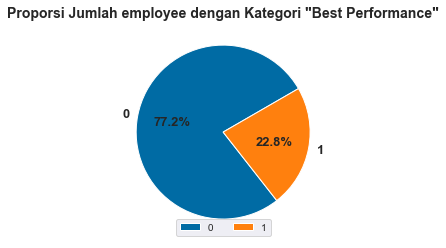

In [44]:
plt.figure(figsize=(4,4))
plt.title('Proporsi Jumlah employee dengan Kategori "Best Performance"', fontsize=14, fontweight='bold')
plt.pie(df_train1['Best Performance'].value_counts(), 
       autopct='%.1f%%', labels=df_train1['Best Performance'].value_counts().index, 
       textprops={'fontsize':13,'fontweight':'bold'}, startangle=30)
plt.legend(loc='lower center', ncol=3)
plt.show()

### `Not Best Performance`

In [45]:
# not_best_employee = df_train1[(df_train1['Last_achievement_%']<100.00) & (df_train1['Achievement_above_100%_during3quartal']==0)]
# not_best_employee.head()

In [46]:
not_best_employee = df_train1[(df_train1['Last_achievement_%']<100.00) & (df_train1['Achievement_above_100%_during3quartal']==0)]
not_best_employee.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,marital_status_maried(Y/N),number_of_dependences,Education_level,...,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,age_now,year_since_graduated
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,Y,1,level_0,...,2,3,2,3,0,46.37,0.0,0,36,10
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,Y,0,level_1,...,4,3,0,0,1,47.68,0.0,0,32,14
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,Y,1,level_1,...,10,9,6,2,1,40.73,0.0,0,51,32
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,Y,2,level_1,...,11,6,0,4,10,47.42,0.0,1,54,34
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,Y,3,level_1,...,9,8,2,3,0,47.18,0.0,0,56,36


In [47]:
len(not_best_employee)

7597

In [48]:
# These employees should be considered all as a not best performer
# because they last achievemnt below 100% & their achievment for last 3 years never pass 100%  
not_best_employee['Best Performance'].value_counts()

0    6457
1    1140
Name: Best Performance, dtype: int64

In [49]:
not_best_employee['Last_achievement_%'].describe()

count    7597.000000
mean       60.714025
std        16.375521
min         4.510000
25%        51.390000
50%        63.070000
75%        73.280000
max        85.000000
Name: Last_achievement_%, dtype: float64

In [50]:
not_best_employee['Achievement_above_100%_during3quartal'].describe()

count    7597.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Achievement_above_100%_during3quartal, dtype: float64

In [51]:
not_best_employee['Best Performance'].unique()

array([0, 1], dtype=int64)

In [52]:
# We have 1140 employees who have Last achievement below 100.00 & never achived above 100% during last 3 years
not_best_employee['Best Performance'].value_counts()
# these data seemed quite odd. they should be considered as not Best Performance

0    6457
1    1140
Name: Best Performance, dtype: int64

In [53]:
# Convert 1 to 0
not_best_employee['Best Performance'] = not_best_employee['Best Performance'].map({0:0,1:0})

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
not_best_employee['Best Performance'].unique()

array([0], dtype=int64)

In [55]:
not_best_employee['Best Performance'].value_counts()

0    7597
Name: Best Performance, dtype: int64

In [56]:
df_train1.loc[not_best_employee.index,'Best Performance'] = not_best_employee['Best Performance']

In [57]:
df_train1

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,marital_status_maried(Y/N),number_of_dependences,Education_level,...,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,age_now,year_since_graduated
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,Y,1,level_0,...,2,3,2,3,0,46.37,0.0,0,36,10
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,Y,0,level_1,...,4,3,0,0,1,47.68,0.0,0,32,14
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,Y,1,level_1,...,10,9,6,2,1,40.73,0.0,0,51,32
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,Y,2,level_1,...,11,6,0,4,10,47.42,0.0,0,54,34
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,Y,3,level_1,...,9,8,2,3,0,47.18,0.0,0,56,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,Y,1,level_5,...,3,3,0,4,1,50.87,0.0,0,35,5
11149,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,Y,2,level_5,...,1,2,0,6,0,79.91,0.0,0,33,6
11150,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,Y,0,level_5,...,1,2,0,4,0,78.38,0.0,0,30,4
11151,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,Y,1,level_5,...,5,4,0,4,1,85.94,1.0,0,34,9


In [58]:
df_train1['Best Performance'].unique()

array([0, 1], dtype=int64)

In [59]:
df_train1['Best Performance'].value_counts()

0    9754
1    1398
Name: Best Performance, dtype: int64

In [60]:
#Check
print(not_best_employee['Last_achievement_%'].describe())
print()
print(not_best_employee['Achievement_above_100%_during3quartal'].describe())

count    7597.000000
mean       60.714025
std        16.375521
min         4.510000
25%        51.390000
50%        63.070000
75%        73.280000
max        85.000000
Name: Last_achievement_%, dtype: float64

count    7597.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Achievement_above_100%_during3quartal, dtype: float64


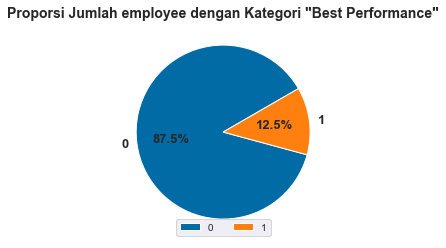

In [61]:
plt.figure(figsize=(4,4))
plt.title('Proporsi Jumlah employee dengan Kategori "Best Performance"', fontsize=14, fontweight='bold')
plt.pie(df_train1['Best Performance'].value_counts(), 
       autopct='%.1f%%', labels=df_train1['Best Performance'].value_counts().index, 
       textprops={'fontsize':13,'fontweight':'bold'}, startangle=30)
plt.legend(loc='lower center', ncol=3)
plt.show()

In [62]:
#Checking

In [63]:
df_train1[df_train1['Last_achievement_%']>=100.00]['Best Performance'].value_counts()

1    1085
0     367
Name: Best Performance, dtype: int64

In [64]:
df_train1[df_train1['Achievement_above_100%_during3quartal']==3]['Best Performance'].value_counts()

1    1143
0     461
Name: Best Performance, dtype: int64

In [65]:
df_train1[(df_train1['Last_achievement_%']>=100.00)|(df_train1['Achievement_above_100%_during3quartal']<3)]['Best Performance'].value_counts()

0    9293
1    1296
Name: Best Performance, dtype: int64

In [66]:
df_train1[(df_train1['Last_achievement_%']<100.00)|(df_train1['Achievement_above_100%_during3quartal']<3)]['Best Performance'].value_counts()

0    9754
1     357
Name: Best Performance, dtype: int64

In [67]:
df_train1[df_train1['Last_achievement_%']<100.00]['Best Performance'].value_counts()

0    9387
1     313
Name: Best Performance, dtype: int64

In [68]:
df_train1[df_train1['Achievement_above_100%_during3quartal']<3]['Best Performance'].value_counts()

0    9293
1     255
Name: Best Performance, dtype: int64

In [69]:
df_train1['Best Performance'].unique()

array([0, 1], dtype=int64)

In [70]:
df_train1['Best Performance'].value_counts()

0    9754
1    1398
Name: Best Performance, dtype: int64

In [71]:
#For Employee who has Last Achievement below 100%
df_train1[df_train1['Last_achievement_%']<100.00]['Best Performance'].value_counts()

0    9387
1     313
Name: Best Performance, dtype: int64

In [72]:
#For Employee who has Last Achievement below 100% but considered as 'Best Performance'
achv = df_train1[df_train1['Last_achievement_%']<100.00]
achv[achv['Best Performance']==1]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,marital_status_maried(Y/N),number_of_dependences,Education_level,...,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,age_now,year_since_graduated
33,JG04,1.224745,PG03,1.224745,1.118034,RM_type_B,2,Y,1,level_1,...,2,2,0,2,0,97.30,1.0,1,32,14
43,JG05,2.692582,PG06,2.345208,1.191638,RM_type_A,2,Y,2,level_1,...,9,7,0,2,0,88.32,1.0,1,54,34
47,JG05,2.828427,PG06,2.345208,0.911043,RM_type_A,2,Y,2,level_1,...,9,7,1,3,0,99.97,2.0,1,55,36
60,JG05,1.634013,PG06,0.000000,1.224745,RM_type_A,1,Y,3,level_1,...,14,9,1,2,0,98.86,3.0,1,53,34
87,JG05,2.828427,PG06,2.345208,0.707107,RM_type_A,2,Y,2,level_1,...,5,7,9,6,1,95.78,2.0,1,55,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11013,JG04,1.322876,PG03,1.322876,0.707107,RM_type_A,2,Y,1,level_4,...,3,4,8,0,3,45.50,1.0,1,35,9
11097,JG04,1.385641,PG03,1.385641,0.412311,RM_type_A,2,Y,1,level_4,...,4,5,0,2,0,77.69,1.0,1,39,14
11120,JG04,2.465766,PG04,1.732051,0.000000,RM_type_C,1,Y,1,level_5,...,11,8,0,12,14,65.13,1.0,1,39,11
11128,JG04,1.555635,PG03,1.555635,1.870829,RM_type_A,2,Y,1,level_5,...,3,2,0,3,0,91.43,3.0,1,39,9


In [73]:
# Checking achivemet last 3 years for Employee who has Last Achievement below 100% but considered as 'Best Performance'
achv[achv['Best Performance']==1]['Achievement_above_100%_during3quartal'].value_counts()
#Still Possible

1.0    135
3.0    102
2.0     76
Name: Achievement_above_100%_during3quartal, dtype: int64

In [74]:
# Employee who has not ever achived above 100% during last 3 years
df_train1[df_train1['Achievement_above_100%_during3quartal']==0]['Best Performance'].value_counts()
# Its Logic, impossible for employee with this category considered as Best Performance.
# Its logic to considered this as Non Best Performer because they never achieved KPI even for a 1 year

0    7597
Name: Best Performance, dtype: int64

In [75]:
df_train1[(df_train1['Last_achievement_%']<100.00)&(df_train1['Achievement_above_100%_during3quartal']==0)]['Best Performance'].value_counts()

0    7597
Name: Best Performance, dtype: int64

In [76]:
df_train1['Best Performance'].value_counts()

0    9754
1    1398
Name: Best Performance, dtype: int64

## Cleaned Data

In [77]:
df_train1

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,marital_status_maried(Y/N),number_of_dependences,Education_level,...,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,age_now,year_since_graduated
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,Y,1,level_0,...,2,3,2,3,0,46.37,0.0,0,36,10
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,Y,0,level_1,...,4,3,0,0,1,47.68,0.0,0,32,14
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,Y,1,level_1,...,10,9,6,2,1,40.73,0.0,0,51,32
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,Y,2,level_1,...,11,6,0,4,10,47.42,0.0,0,54,34
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,Y,3,level_1,...,9,8,2,3,0,47.18,0.0,0,56,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,Y,1,level_5,...,3,3,0,4,1,50.87,0.0,0,35,5
11149,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,Y,2,level_5,...,1,2,0,6,0,79.91,0.0,0,33,6
11150,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,Y,0,level_5,...,1,2,0,4,0,78.38,0.0,0,30,4
11151,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,Y,1,level_5,...,5,4,0,4,1,85.94,1.0,0,34,9


In [91]:
# Save to csv
# df_train1.to_csv('cleaned_data.csv', index=False)